In [0]:
import numpy as np
import pandas as pd 
from google.colab import drive 

In [0]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df=pd.read_csv('gdrive/My Drive/JIGSAW/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train.csv', skipinitialspace=True)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [0]:
tries = df[0:5]

In [0]:
tries.shape[0]

5

In [0]:
import string

In [0]:
print(tries['comment_text'][1])
sentence = tries['comment_text'][1]
p=0
for i in sentence:
  if i in string.punctuation:
    print(i)
    p+=1
print(p)

D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
'
!
'
.
.
(
)
:
,
,
(
)
12


In [0]:
# sentence = tries['comment_text'][0]
# print(tries['comment_text'][0])

punct_count=[]
for j in range(len(df)):
  k=0
  for i in df.iloc[j,1]:
    if i in string.punctuation:
      k += 1
  punct_count.append(k)
print(len(punct_count))

223549


In [0]:
df['punct']=punct_count

In [0]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length,punct
223544,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0,596,17
223545,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0,181,20
223546,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0,82,10
223547,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0,137,2
223548,fffb5451268fb5ba,""" \n\n == Unicorn lair discovery == \n\n Suppo...",0,0,0,0,0,0,277,16


In [0]:
length = [len(df.iloc[i,1]) for i in range(len(df))]
len(length)

223549

In [0]:
df['length'] = length

In [0]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length,punct
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,10
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,12
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,6
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,21
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,5
...,...,...,...,...,...,...,...,...,...,...
223544,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0,596,17
223545,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0,181,20
223546,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0,82,10
223547,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0,137,2


In [0]:
df["length"].describe()

count    223549.000000
mean        391.012709
std         592.862955
min           1.000000
25%          93.000000
50%         203.000000
75%         431.000000
max        5000.000000
Name: length, dtype: float64

In [0]:
df["punct"].describe()

count    223549.000000
mean         16.714756
std          39.238584
min           0.000000
25%           4.000000
50%           9.000000
75%          18.000000
max        4946.000000
Name: punct, dtype: float64

In [0]:
sort_by_punct = df.sort_values('punct')
print(sort_by_punct.tail(n=0))

Empty DataFrame
Columns: [id, comment_text, toxic, severe_toxic, obscene, threat, insult, identity_hate, length, punct]
Index: []


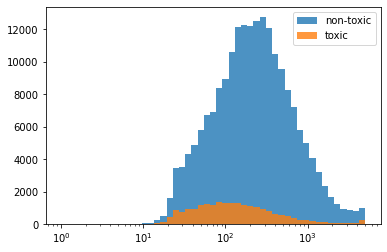

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.19**(np.arange(0,50))
plt.hist(df[df['toxic']==0]['length'],bins=bins,alpha=0.8)
plt.hist(df[df['toxic']==1]['length'],bins=bins,alpha=0.8)
plt.legend(("non-toxic","toxic"))
plt.show()

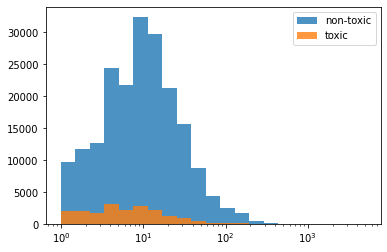

In [0]:
plt.xscale('log')
bins = 1.5**(np.arange(0,22))
plt.hist(df[df['toxic']==0]['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['toxic']==1]['punct'],bins=bins,alpha=0.8)
plt.legend(("non-toxic","toxic"))
plt.show()

In [0]:
# TESTING THE COMMIT